In [1]:
import pandas as pd

# 1. Import data into dataframe

In [2]:
#import data by reading json file to dataframe
data = pd.read_json(r'D:\Data mining\Lab 2\Kaggle competition\tweets_DM.json', lines=True)

In [3]:
data.to_json(orient='index')

In [5]:
#parse the dataframe of _source to hastags, text, and id for further investigation
from pandas.io.json import json_normalize
result = json_normalize(data._source)

In [8]:
score = data._score

In [10]:
#save the file to csv format
export_csv = result.to_csv (r'D:\Data mining\Lab 2\Kaggle competition\data_source.csv', index = None, header=True) #Don't forget to add '.csv' at the end of the path
export_csv = score.to_csv (r'D:\Data mining\Lab 2\Kaggle competition\data_score.csv', index = None, header=True) #Don't forget to add '.csv' at the end of the path
#print (df_result)

reference for parsing: 
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.io.json.json_normalize.html

In [7]:
result

,tweet.hashtags,tweet.text,tweet.tweet_id
0,[Snapchat],"People who post ""add me on #Snapchat"" must be ...",0x376b20
1,"[freepress, TrumpLegacy, CNN]","@brianklaas As we see, Trump is dangerous to #...",0x2d5350
2,[bibleverse],"Confident of your obedience, I write to you, k...",0x28b412
3,[],Now ISSA is stalking Tasha 😂😂😂 <LH>,0x1cd5b0
4,[],"""Trust is not the same as faith. A friend is s...",0x2de201
5,"[authentic, LaughOutLoud]",@RISKshow @TheKevinAllison Thx for the BEST TI...,0x1d755c
6,[],Still waiting on those supplies Liscus. <LH>,0x2c91a8
7,[],Love knows no gender. 😢😭 <LH>,0x368e95
8,[LeagueCup],@DStvNgCare @DStvNg More highlights are being ...,0x249c0c
9,"[materialism, money, possessions]",When do you have enough ? When are you satisfi...,0x218443


In [8]:
#import emotion file
emotion = pd.read_csv(r'D:\Data mining\Lab 2\Kaggle competition\emotion.csv')

In [9]:
#import data identification file
alldata = pd.read_csv(r'D:\Data mining\Lab 2\Kaggle competition\data_identification.csv')

In [10]:
#assign column names to result dataframe
result.columns = ['hashtags','text','id']

In [11]:
#assign column names to emotion dataframe
emotion.columns = ['id','emotion']

In [12]:
#assign column names to alldata dataframe(identification)
alldata.columns = ['id','identification']

In [13]:
#merge all data according to id
df = pd.merge(result, emotion, on=['id'])

reference for merging: https://stackoverflow.com/questions/44781633/join-pandas-dataframes-based-on-column-values

# 2. Prepare training and testing dataset

In [14]:
# IDENTIFY THE TRAIN_DATASET

#merge all data according to id
train_data = pd.merge(df, alldata, on=['id'])

#https://stackoverflow.com/questions/44781633/join-pandas-dataframes-based-on-column-values

### 2.1 Overall Emotion Distribution
Perform a some preprocessing. 
Noted that the result is not even distributed

In [15]:
#take a look at the overall emotion distribution

#group to find distribution
train_data.groupby(['emotion']).count()['text']

emotion
anger            39867
anticipation    248935
disgust         139101
fear             63999
joy             516017
sadness         193437
surprise         48729
trust           205478
Name: text, dtype: int64

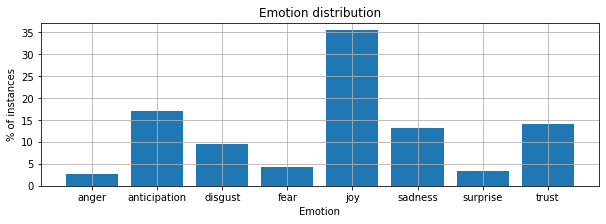

In [16]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# the histogram of the data
labels = train_data['emotion'].unique()
post_total = len(train_data)
df1 = train_data.groupby(['emotion']).count()['text']
df1 = df1.apply(lambda x: round(x*100/post_total,3))

#plot
fig, ax = plt.subplots(figsize=(10,3))
plt.bar(df1.index,df1.values)

#arrange
plt.ylabel('% of instances')
plt.xlabel('Emotion')
plt.title('Emotion distribution')
plt.grid(True)
plt.show()

In [17]:
#prepare the test_dataset

#merge all data according to id
test_cut = pd.merge(result, alldata, on=['id'])
#https://stackoverflow.com/questions/44781633/join-pandas-dataframes-based-on-column-values

In [18]:
#filter the test and train to seperate them
test =  test_cut['identification']=='test'
#https://cmdlinetips.com/2018/02/how-to-subset-pandas-dataframe-based-on-values-of-a-column/

In [19]:
# IDENTIFY THE TEST_DATASET

test_data = test_cut[test]

In [20]:
test_data

,hashtags,text,id,identification
2,[bibleverse],"Confident of your obedience, I write to you, k...",0x28b412,test
4,[],"""Trust is not the same as faith. A friend is s...",0x2de201,test
9,"[materialism, money, possessions]",When do you have enough ? When are you satisfi...,0x218443,test
30,"[GodsPlan, GodsWork]","God woke you up, now chase the day #GodsPlan #...",0x2939d5,test
33,[],"In these tough times, who do YOU turn to as yo...",0x26289a,test
35,[],Turns out you can recognise people by their un...,0x31c6e0,test
37,[sheltered],"I like how Hayvens mommy, daddy, and the keybo...",0x32edee,test
46,[notamused],I just love it when every single one of my son...,0x3714ee,test
49,[CelebrityBigBrother],@JulieChen when can we expect a season of #Cel...,0x235628,test
56,[],Tbh. Regret hurts more than stepping on a LEGO...,0x283024,test


# 3. Train the model

In [21]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

In [22]:
#remove stopwords from train_data and test_data text
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
stop = stopwords.words('english')

replace_set = stop



train_data['text'] = train_data['text'].str.split(' ').apply(lambda x: ' '.join(k for k in x if k not in replace_set))
test_data['text'] = test_data['text'].str.split(' ').apply(lambda x: ' '.join(k for k in x if k not in replace_set))
#train_data['text'].apply(lambda x: [item for item in x if item not in stop])
#test_data['text'].apply(lambda x: [item for item in x if item not in stop])

C:\Users\ratana\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [23]:
#also remove stopwords from the column hashtags just in case

train_data['hashtags'] = train_data['text'].str.split(' ').apply(lambda x: ' '.join(k for k in x if k not in replace_set))

In [ ]:
# import necessary package
import numpy as np
import pandas as pd
import re       # regular expression to filter show patter/word out
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

In [ ]:
def cleanPunc(sentence):
    #remove word in () include word connected by _or- but won't remove sentences
    cleaned = re.sub(r'\([A-Z|a-z]+\)',r'',sentence)
    #remove punctuation
    cleaned = re.sub(r'[?|!|\'|"|#|:|;|,|.|%|<|>|\(|\)|\^|\||/|\[|\]|&|*|+|=|@|`|~]',r'',cleaned)
    #remove space \n in the end of the sentences
    cleaned = cleaned.strip()
    #remove numbers and words right follow numbers like XXcm(or XX-cm, XX-) but XX cm won't be remove
    cleaned = re.sub(r'\d+\-\w*|\d+\w+|\d+',r'',cleaned)
    #remove - in -XXX or XXX- or -- but no XXX-XXX
    cleaned = re.sub(r'(?<=\w)-(?!\w)|(?<!\w)-(?=\w)|--|(?<!\w)-(?!\w)',r'',cleaned)
    #remove space and - in the start or end of the sentences again
    cleaned = cleaned.strip(' -')
    #incase there are two space 
    cleaned = cleaned.replace('  ',' ')   
    return cleaned

In [ ]:
#remove punctuations by ALU's code
train_data['text'] = train_data['text'].str.apply(cleanPunc)

In [ ]:
test_data['text'] = test_data['text'].str.apply(cleanPunc)

In [44]:
#remove punctuations by yourself
train_data['text'] = train_data['text'].str.replace('[^\w\s]','')

In [45]:
test_data['text'] = test_data['text'].str.replace('[^\w\s]','')

C:\Users\ratana\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [52]:
#combine the hashtags and the text columns before tokenize

combined_text = train_data[['text','hashtags']].astype(str).apply('-'.join, axis=1)

In [53]:
##combine the hashtags and the text columns before tokenize

text_test = test_data[['text','hashtags']].astype(str).apply('-'.join, axis=1)

In [55]:
#create word vectors
temp = CountVectorizer()
traincv =temp.fit_transform(combined_text)
testcv =temp.transform(text_test)

In [57]:
test_data['emotion'] = pd.Series()

C:\Users\ratana\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


We choose multinomial NB as the model to train due to the multiclassification labels

In [58]:
# MULTINOMIALNB TRIAL

#test the training data
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

X_train1, Y_train1 = traincv,train_data['emotion']
X_test1,  Y_test1 = testcv,test_data['emotion']

bnb = MultinomialNB()
bnb.fit(X_train1, Y_train1)
bnb.score(X_train1, Y_train1)

0.6620579116122078

# 4. Test the testing data

In [59]:
##build Naive Bayes model
DT_model1 = MultinomialNB()

## training!
DT_model1 = DT_model1.fit(X_train1, Y_train1)

## predict!
Y_train_pred1 = DT_model1.predict(X_train1)

X_test1 = testcv
Y_test_pred1 = DT_model1.predict(testcv)

## so we get the pred result
#Y_test_pred1[:10]

In [60]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train1 = accuracy_score(y_true=Y_train1, y_pred=Y_train_pred1)
#acc_test1 = accuracy_score(y_true=Y_test1, y_pred=Y_test_pred1)

print('training accuracy: {}'.format(round(acc_train1, 2)))

training accuracy: 0.66


In [61]:
test_id = test_data.id

In [62]:
# Using map() and lambda 
def listOfTuples(test_id, Y_test_pred1): 
    return list(map(lambda x, y:(x,y), test_id, Y_test_pred1)) 

In [63]:
final_result = (listOfTuples(test_id, Y_test_pred1))

In [64]:
final_result[0:1]

[('0x28b412', 'anticipation')]

In [65]:
type(final_result)

list

# 5. Prepare the result dataframe and save as .cvs file

In [66]:
df_result = pd.DataFrame(final_result) 

In [67]:
#preview the result
df_result[20000:20010]

,0,1
20000,0x2996bd,disgust
20001,0x269ff2,joy
20002,0x1f6844,trust
20003,0x3131ab,disgust
20004,0x37054a,joy
20005,0x1f0ce2,disgust
20006,0x31f71b,disgust
20007,0x1f9fa1,sadness
20008,0x250639,sadness
20009,0x31bf7a,joy


In [68]:
#assign header names
df_result.columns = ['id','emotion']

In [69]:
df_result

,id,emotion
0,0x28b412,anticipation
1,0x2de201,anticipation
2,0x218443,anticipation
3,0x2939d5,anticipation
4,0x26289a,anticipation
5,0x31c6e0,joy
6,0x32edee,disgust
7,0x3714ee,disgust
8,0x235628,disgust
9,0x283024,joy


In [70]:
#save the file to csv format
export_csv = df_result.to_csv (r'D:\Data mining\Lab 2\Kaggle competition\kaggle_result4.csv', index = None, header=True) #Don't forget to add '.csv' at the end of the path

print (df_result)

              id       emotion
0       0x28b412  anticipation
1       0x2de201  anticipation
2       0x218443  anticipation
3       0x2939d5  anticipation
4       0x26289a  anticipation
5       0x31c6e0           joy
6       0x32edee       disgust
7       0x3714ee       disgust
8       0x235628       disgust
9       0x283024           joy
10      0x25dcd8           joy
11      0x33df6e           joy
12      0x2d6cb6       sadness
13      0x21d36a           joy
14      0x34fc3e           joy
15      0x338b96           joy
16      0x38895c           joy
17      0x260d2b           joy
18      0x38c20a  anticipation
19      0x21ee14       disgust
20      0x245e5b       sadness
21      0x2fa1a8           joy
22      0x340bc5  anticipation
23      0x21114e           joy
24      0x32d429           joy
25      0x380533           joy
26      0x2e59dd       sadness
27      0x32de62       disgust
28      0x2f2f42           joy
29      0x2b3f7a       sadness
...          ...           ...
411942  